# Analizando tiburones:

## ¿existe un comportamiento lógico?

### 1. Limpieza de datos

En primer lugar, importo los módulos necesarios, entre los que está el de mis funciones y, a continuación, abro el csv que contiene el data set.

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import src.cleaning as cl

In [4]:
shark=pd.read_csv("input/attacks.csv", encoding='cp1252')

In [5]:
sharks_data=pd.DataFrame(shark)

In [6]:
sharks_data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
sharks_data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

La última columna que aparece en la descripción del csv en kaggle es investigador. 
Por ello, eliminamos el resto de columnas que le siguen

In [8]:
sharks=sharks_data[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source']]

Dado que no tiene ningún sentido analizar aquellos datos que no tienen un case number asignado los vamos a eliminar.

In [9]:
sharks1=sharks[(sharks["Case Number"].isnull()==0)&(sharks["Case Number"]!='0')&(sharks["Case Number"]!='xx')]
sharks1.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker


Al ver la tabla, observamos que la columna year y date no coinciden (en la columna year tienen un 0 pero en la columna date tienen un año asignado). Entonces vamos a intentar que haya una cierta coherencia entre ambas columnas. Con la funcion findYear buscamos en la columna date los años y la sustituimos con los valores encontrados, eliminando el resto de caracteres innecesarios.

In [11]:
sharks1["Date"]=sharks1["Date"].apply(cl.findYear)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Aquellas filas cuyo valor en la columna year sea 0 lo reemplazamos por el año encontrado en la columna date previamente.

In [12]:
sharks1.loc[sharks1["Year"]=='0',"Year"]=sharks1["Date"]

/usr/local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Eliminamos aquellas columnas a las cuales no se les ha podido asignar un año ya que no nos son útiles para nuestro análisis.

In [13]:
shark_years=sharks1[sharks1["Date"]!='no']
data=shark_years[["Case Number","Date","Type","Country"]]

In [14]:
data1=data.rename(columns={"Date":"Year"})

Dado que los datos del type 'invalid' y 'questionable' no ofrecen ningún tipo de información útil los eliminamos. Además, unimos los datos de type 'boating', 'boat' y 'boatomg' ya que se refieren a lo mismo. 

In [15]:
data1.Type.value_counts()

Unprovoked      4582
Provoked         572
Invalid          547
Sea Disaster     234
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [18]:
data2=data1[(data1["Type"]!='Invalid')&(data2["Type"].isnull()==0)]

NameError: name 'data2' is not defined

In [ ]:
data2["Types"]=data2.Type
data2["Types"][data2.Type.str.startswith("B")]="Boating"
data2.Types.value_counts()
data3=data2[data2["Types"]!='Questionable']

Clasificamos los datos obtenidos en función de los tres países seleccionados: Australia, Sudáfrica y Estados Unidos. Para facilitar la visualización, agrupamos los datos a partir del 1900 en décadas (ya que el número de datos registrados aumenta a partir de entonces, siendo más útiles para nuestra investigación).

In [667]:
data_aus=data3[data3["Country"]=="AUSTRALIA"]
data_zaf=data3[data3["Country"]=="SOUTH AFRICA"]
data_usa=data3[data3["Country"]=="USA"]

In [668]:
data_usa["Decade"]=pd.cut(data_usa.Year, bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], labels=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010])
data_zaf["Decade"]=pd.cut(data_zaf.Year, bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], labels=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010])
data_aus["Decade"]=pd.cut(data_aus.Year, bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], labels=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Reseteamos los índices de las 3 tablas

In [669]:
data_aus=data_aus.reset_index(drop=True)
data_zaf=data_zaf.reset_index(drop=True)
data_usa=data_usa.reset_index(drop=True)

Una vez finalizada la limpieza, exportamos los datos a la carpeta output.

In [602]:
data_aus.to_csv("output/attacks_aus.csv")

In [603]:
data_zaf.to_csv("output/attacks_zaf.csv")

In [604]:
data_usa.to_csv("output/attacks_usa.csv")

### 2.Análisis

A continuación, se muestra la tabla de los datos agrupados por décadas y tipos. En concreto, se muestran los de Australia. Queremos visualizar los datos obtenidos y por ello realizamos un gráfico de barras para cada país que muestra la evolución de los tipos de casos a lo largo de las décadas.

In [670]:
data_aus.groupby(["Decade","Types"]).agg({"Types":"count"}).head()

Types
Decade Types              
1900   Boating           0
       Provoked          2
       Sea Disaster      1
       Unprovoked       24
1910   Boating           0

### Data Australia

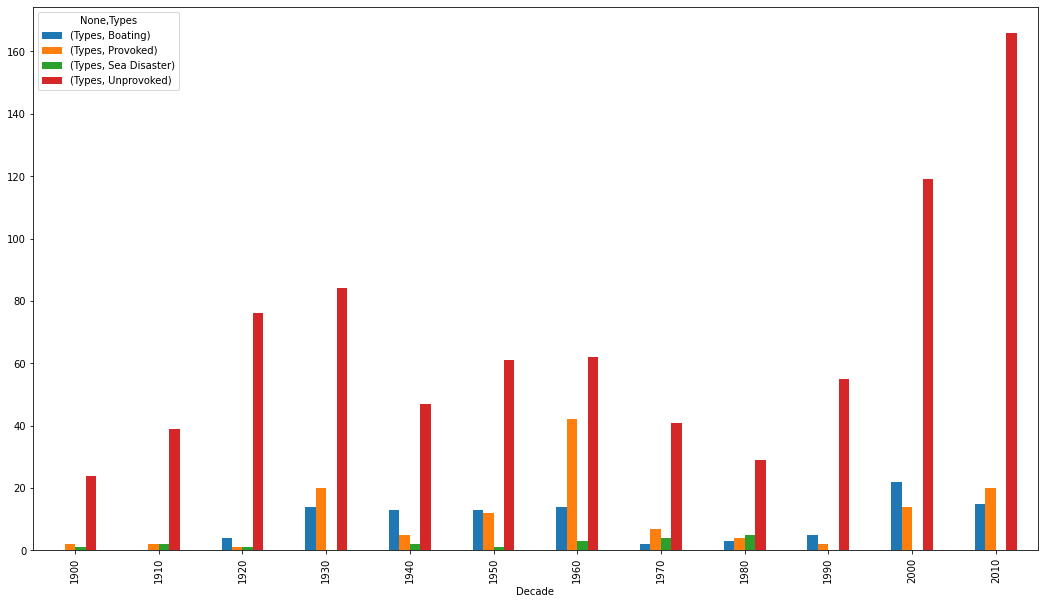

In [671]:
data_aus.groupby(["Decade","Types"]).agg({"Types":"count"}).unstack().plot.bar(figsize=(18,10))

### Data Sudáfrica

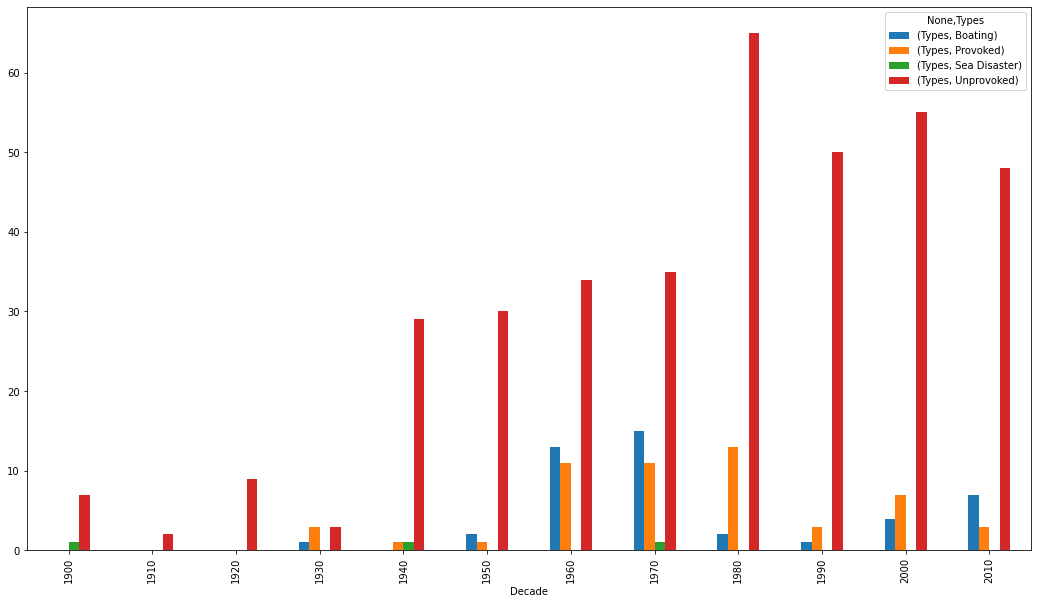

In [600]:
data_zaf.groupby(["Decade","Types"]).agg({"Types":"count"}).unstack().plot.bar(figsize=(18,10))

### Data Estados Unidos

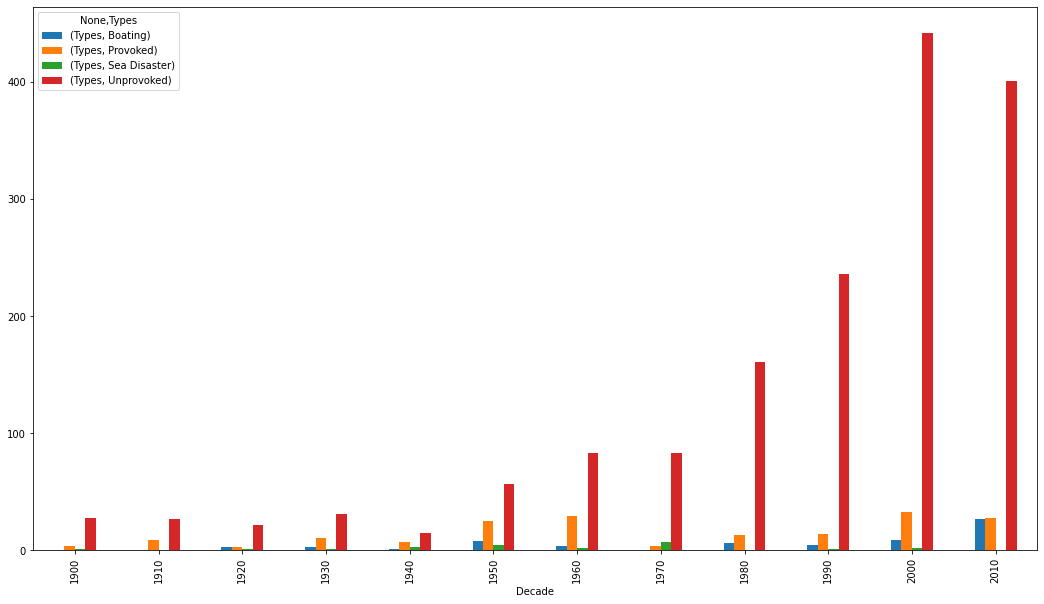

In [601]:
data_usa.groupby(["Decade","Types"]).agg({"Types":"count"}).unstack().plot.bar(figsize=(18,10))

### 3. Conclusión

Tras haber observado los gráficos, podemos concluir que el número de muertes de distinto tipo no sigue ningún tipo de patrón lógico. En consecuencia, nuestra hipótesis queda descartada, ya que, a pesar de que el número de muertes por un tipo determinado se ve reducido en algunos casos tras una decada cuyo número de muertes ha sido alto, no es un comportamiento general de ninguno de los países. Por ello, podemoa afirmar que, efectivamente, el hombre es el único animal que tropieza dos veces en la misma piedra.